In [2]:
%load_ext autoreload
%autoreload 2

In [10]:
from helpers.log_helper import open_log
from helpers.plot_helper import plot_auto_engine_views, plot_partida
import pandas as pd

In [4]:
df = open_log("golquadrado/logs/rodandoliso.msl")

/Users/vsalberice/Desktop/Personal/tokyodrift/helpers/log_helper.py:38: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[c] = pd.to_numeric(df[c], errors="ignore")


In [5]:
#df_filtered = df[238:513]

In [6]:
#df_filtered.to_csv("golquadrado/data/pegou_morreu_filtered.csv", index=False)  # Save the filtered dataframe to a new file

In [7]:
df_filtered = df

In [8]:
df_filtered.columns

Index(['Time', 'SecL', 'RPM', 'MAP', 'MAPxRPM', 'TPS', 'AFR', 'Lambda', 'IAT',
       'CLT', 'Engine', 'DFCO', 'Gego', 'Gair', 'Gbattery', 'Gwarm', 'Gbaro',
       'Gammae', 'Accel Enrich', 'VE (Current', 'VE1', 'VE2', 'PW', 'PW2',
       'PW3', 'PW4', 'AFR Target', 'Lambda Target', 'Duty Cycle',
       'Duty Cycle (Staging', 'TPS DOT', 'Advance (Current', 'Dwell',
       'Dwell (Measured', 'Battery V', 'rpm/s', 'Error #', 'Error ID',
       'Boost PSI', 'Boost cut', 'Hard Launch', 'Hard Limiter', 'Idle Control',
       'IAC value', 'Baro Pressure', 'Fan', 'Sync Loss #', 'Loops/s',
       'Loops/rev', 'Aux0', 'Aux1', 'Aux2', 'Aux3', 'Aux4', 'Aux5', 'Aux6',
       'Aux7', 'Aux8', 'Aux9', 'Aux10', 'Aux11', 'Aux12', 'Aux13', 'Aux14',
       'Aux15', 'Advance 1', 'Advance 2', 'FuelLoad', 'IgnitionLoad',
       'Sync status', 'Engine Prot. RPM', 'Engine Prot. CLT',
       'Trip Meter Miles', 'Odometer Miles', 'Vehicle Speed', 'Power',
       'Torque'],
      dtype='object')

In [11]:
for c in df_filtered.columns:
    if c in df_filtered.columns:
        df_filtered[c] = pd.to_numeric(df_filtered[c], errors="coerce")

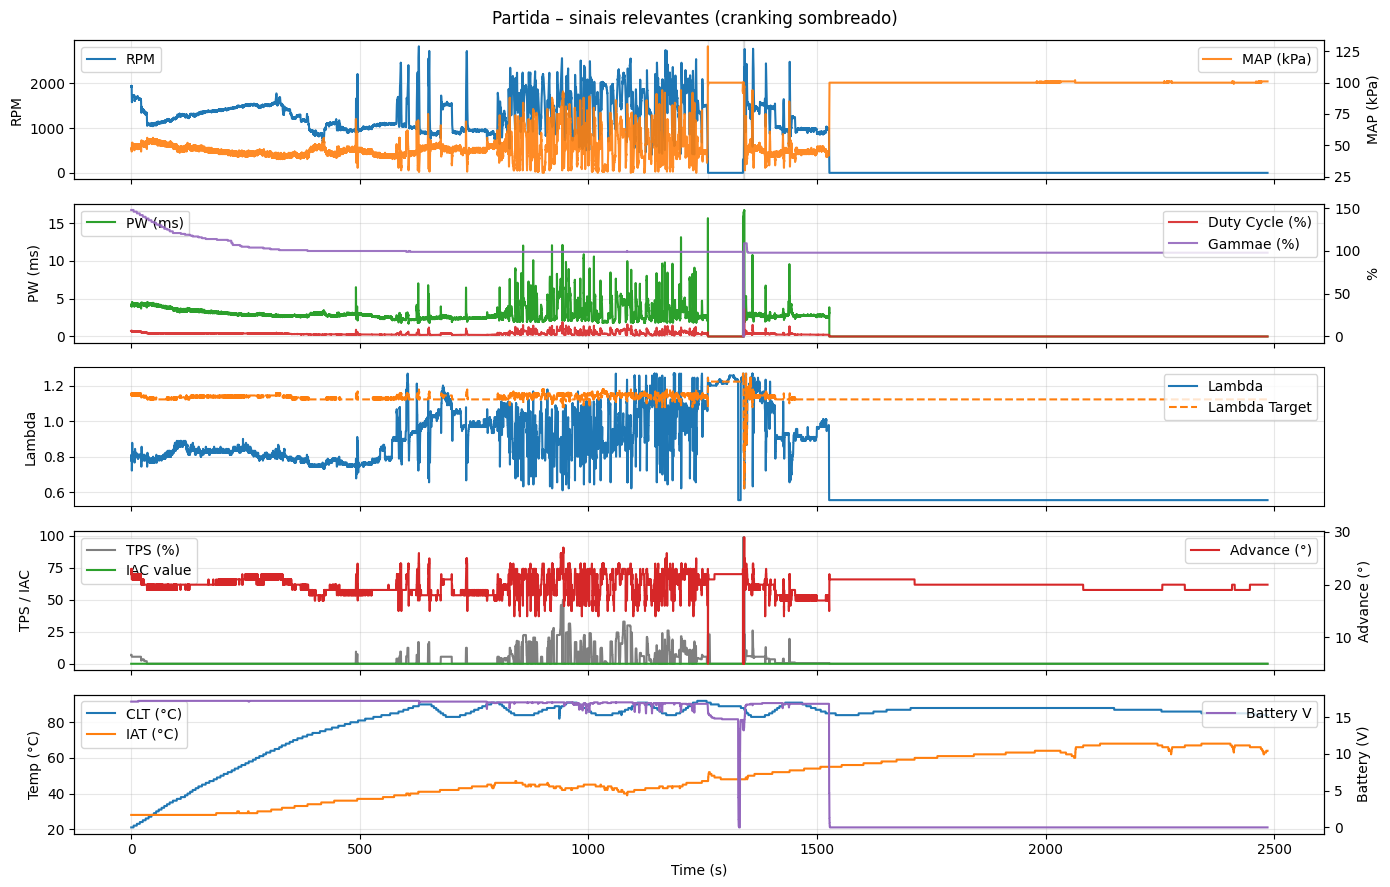

(<Figure size 1400x900 with 9 Axes>,
 array([<Axes: ylabel='RPM'>, <Axes: ylabel='PW (ms)'>,
        <Axes: ylabel='Lambda'>, <Axes: ylabel='TPS / IAC'>,
        <Axes: xlabel='Time (s)', ylabel='Temp (°C)'>], dtype=object))

In [13]:
plot_partida(df_filtered)

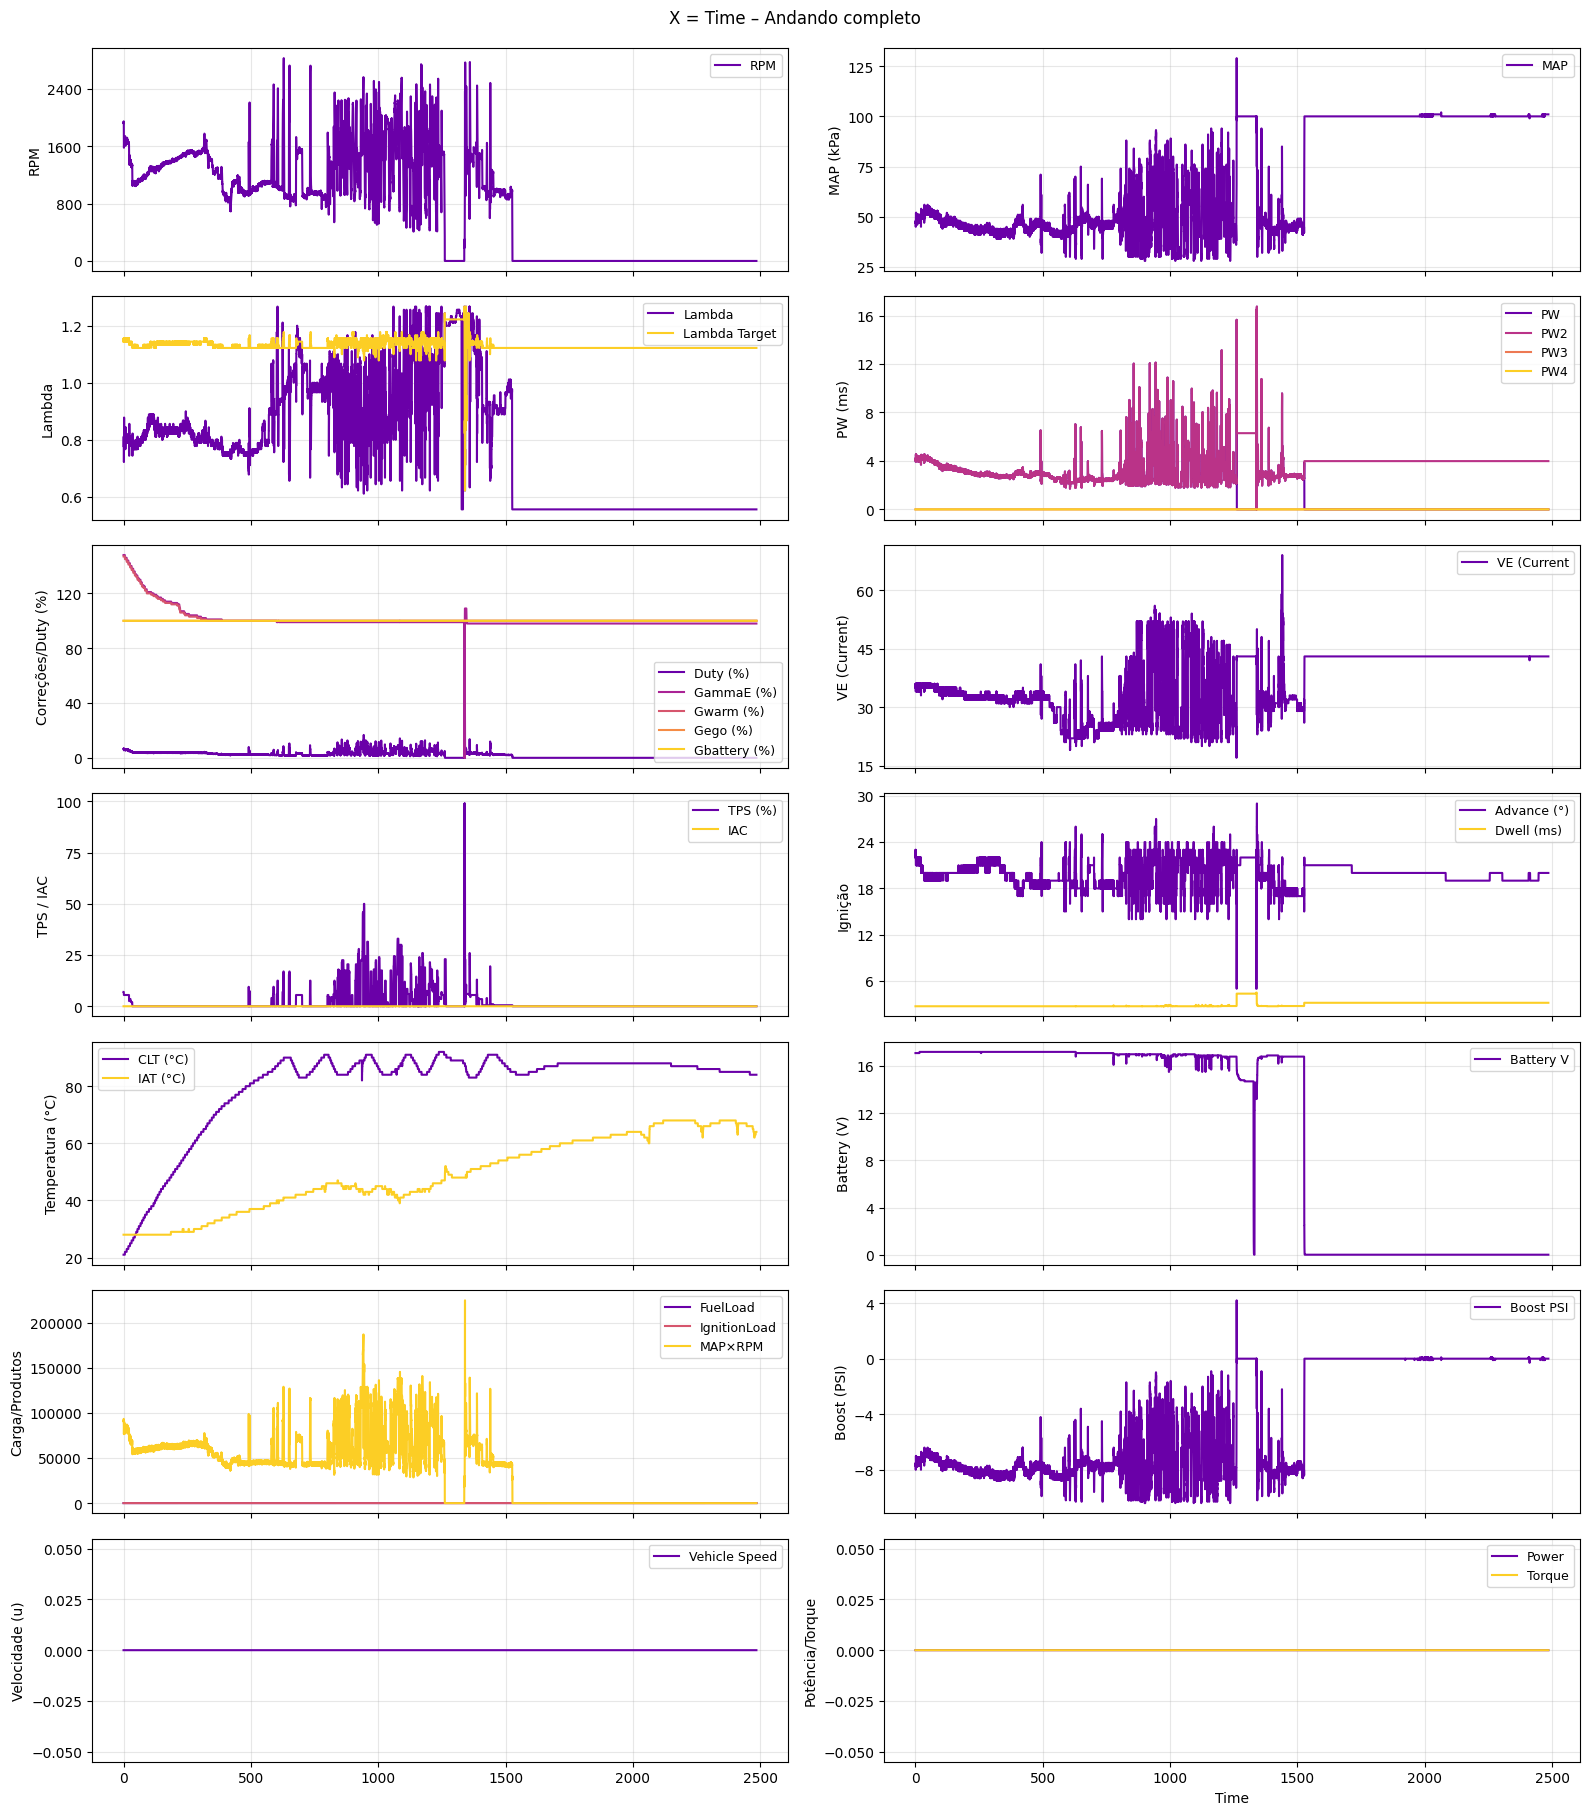

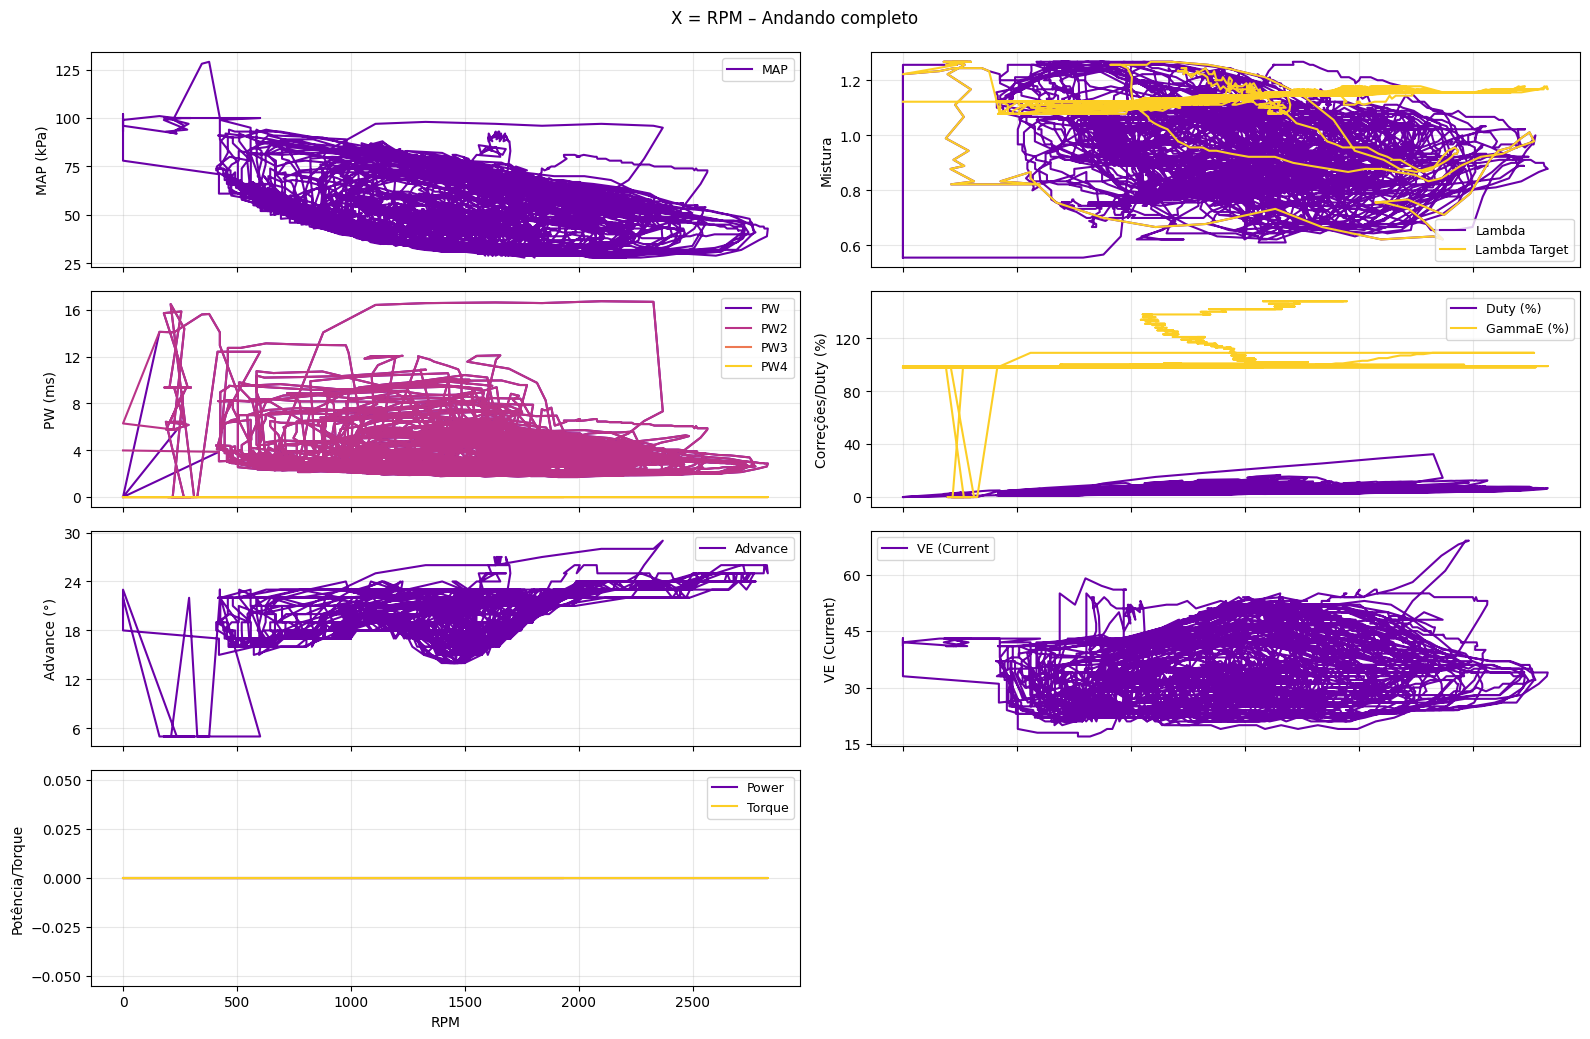

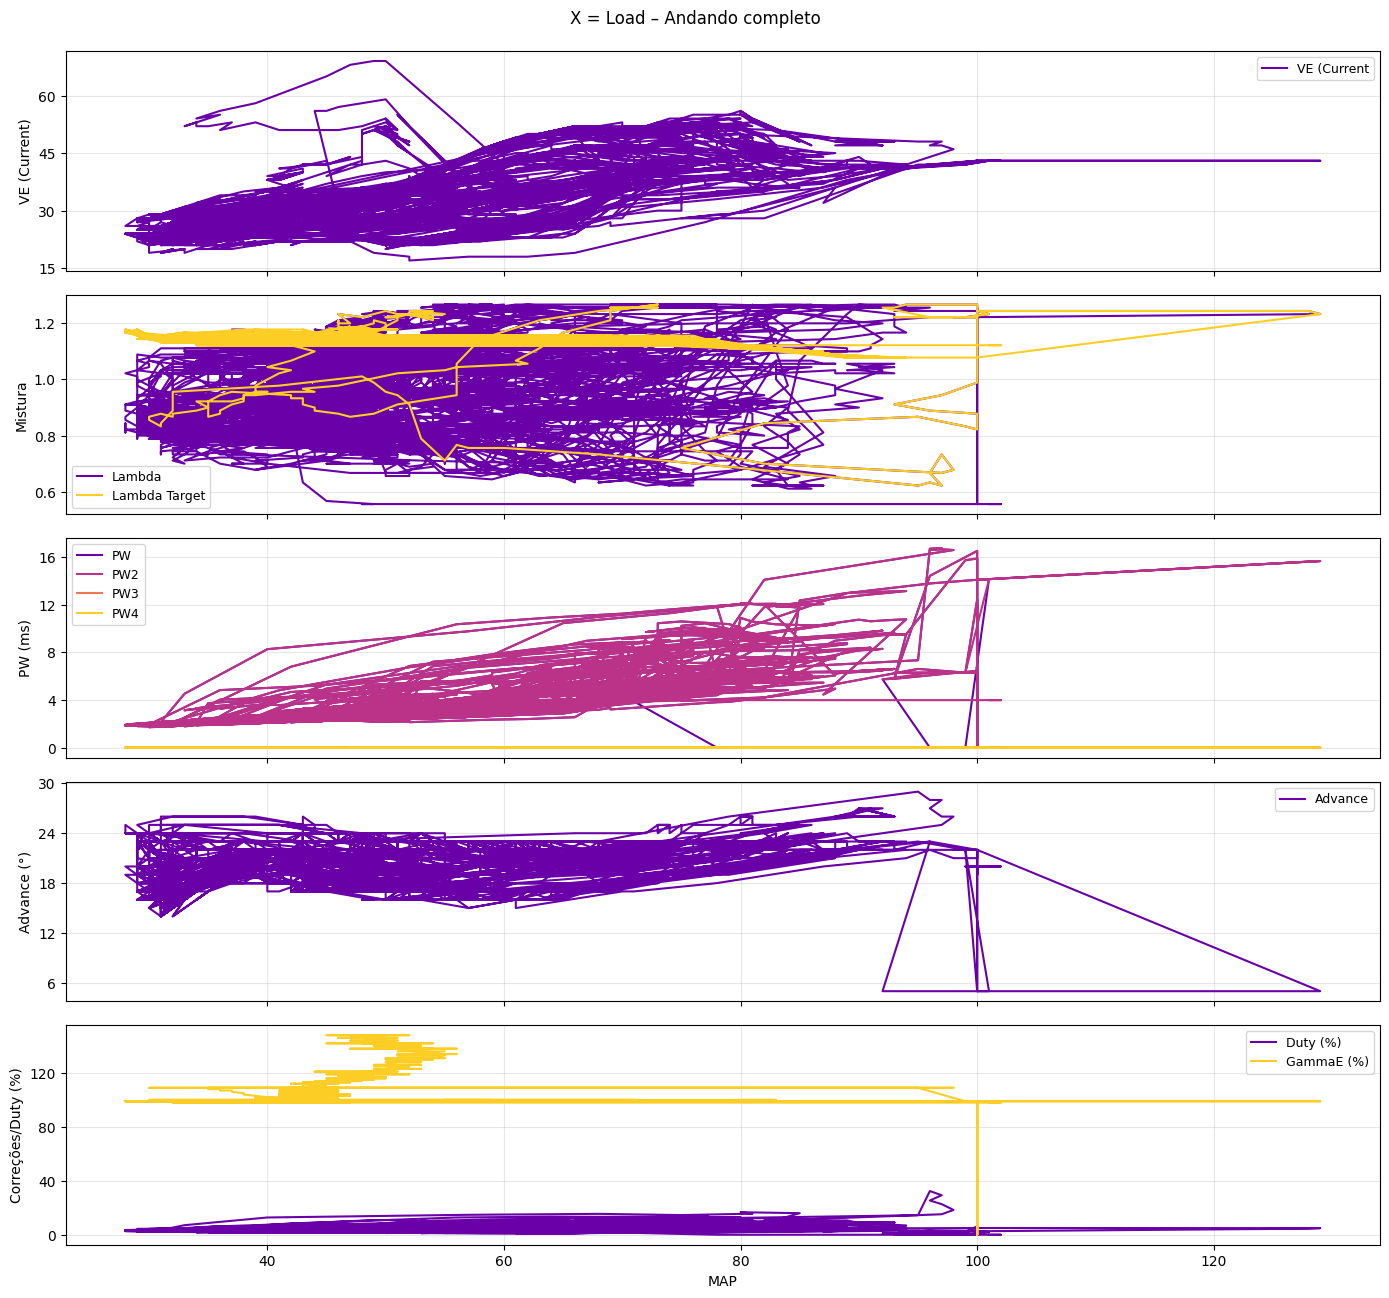

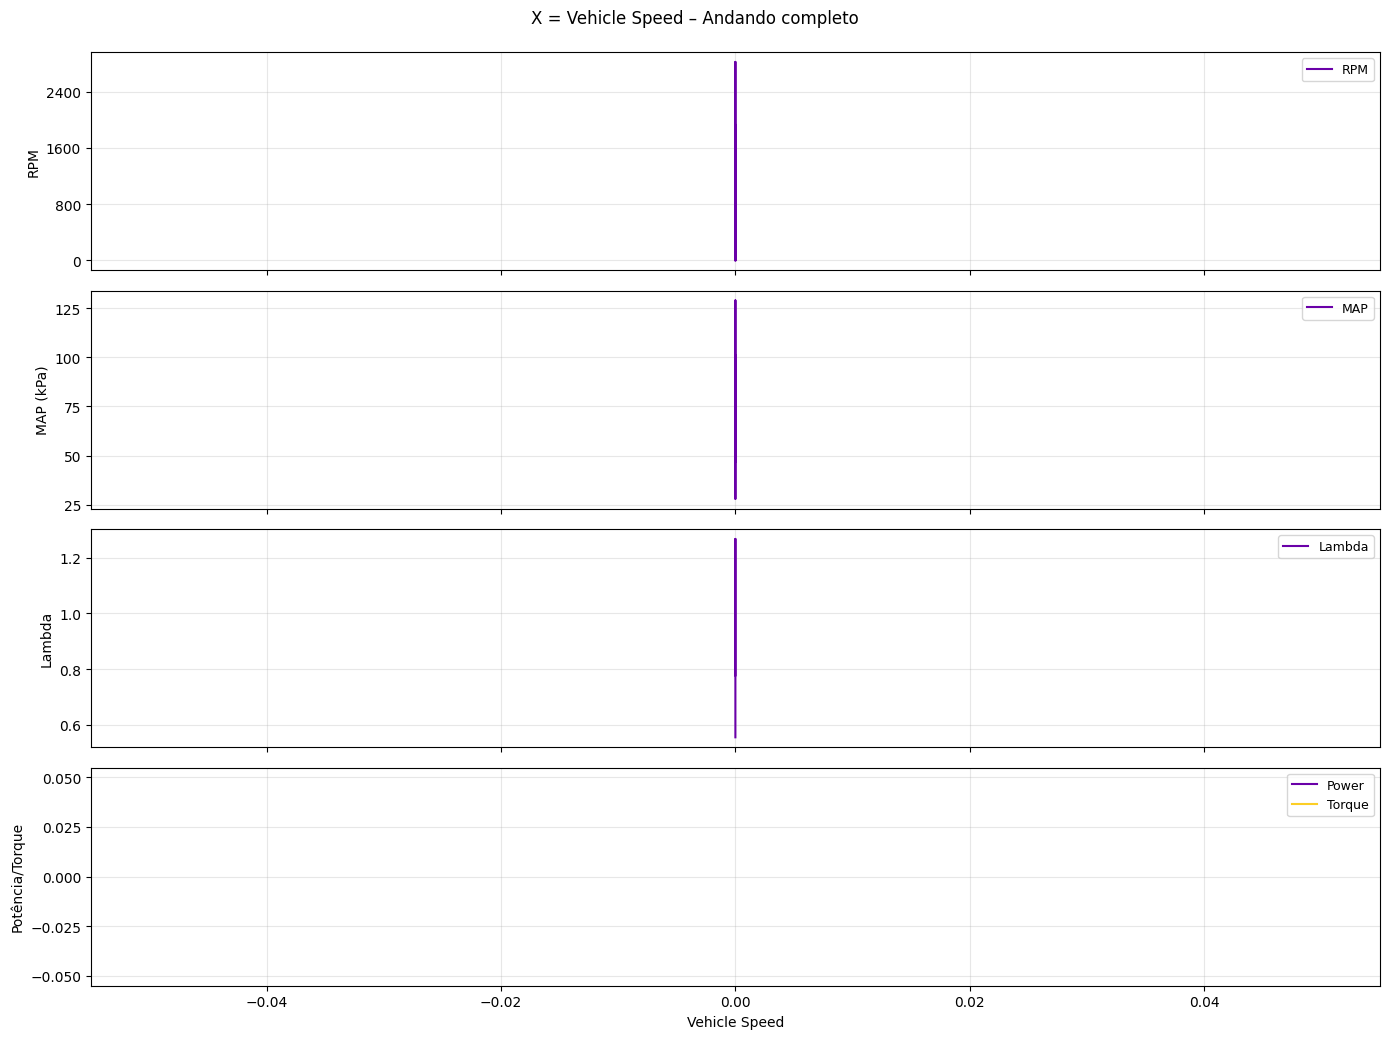

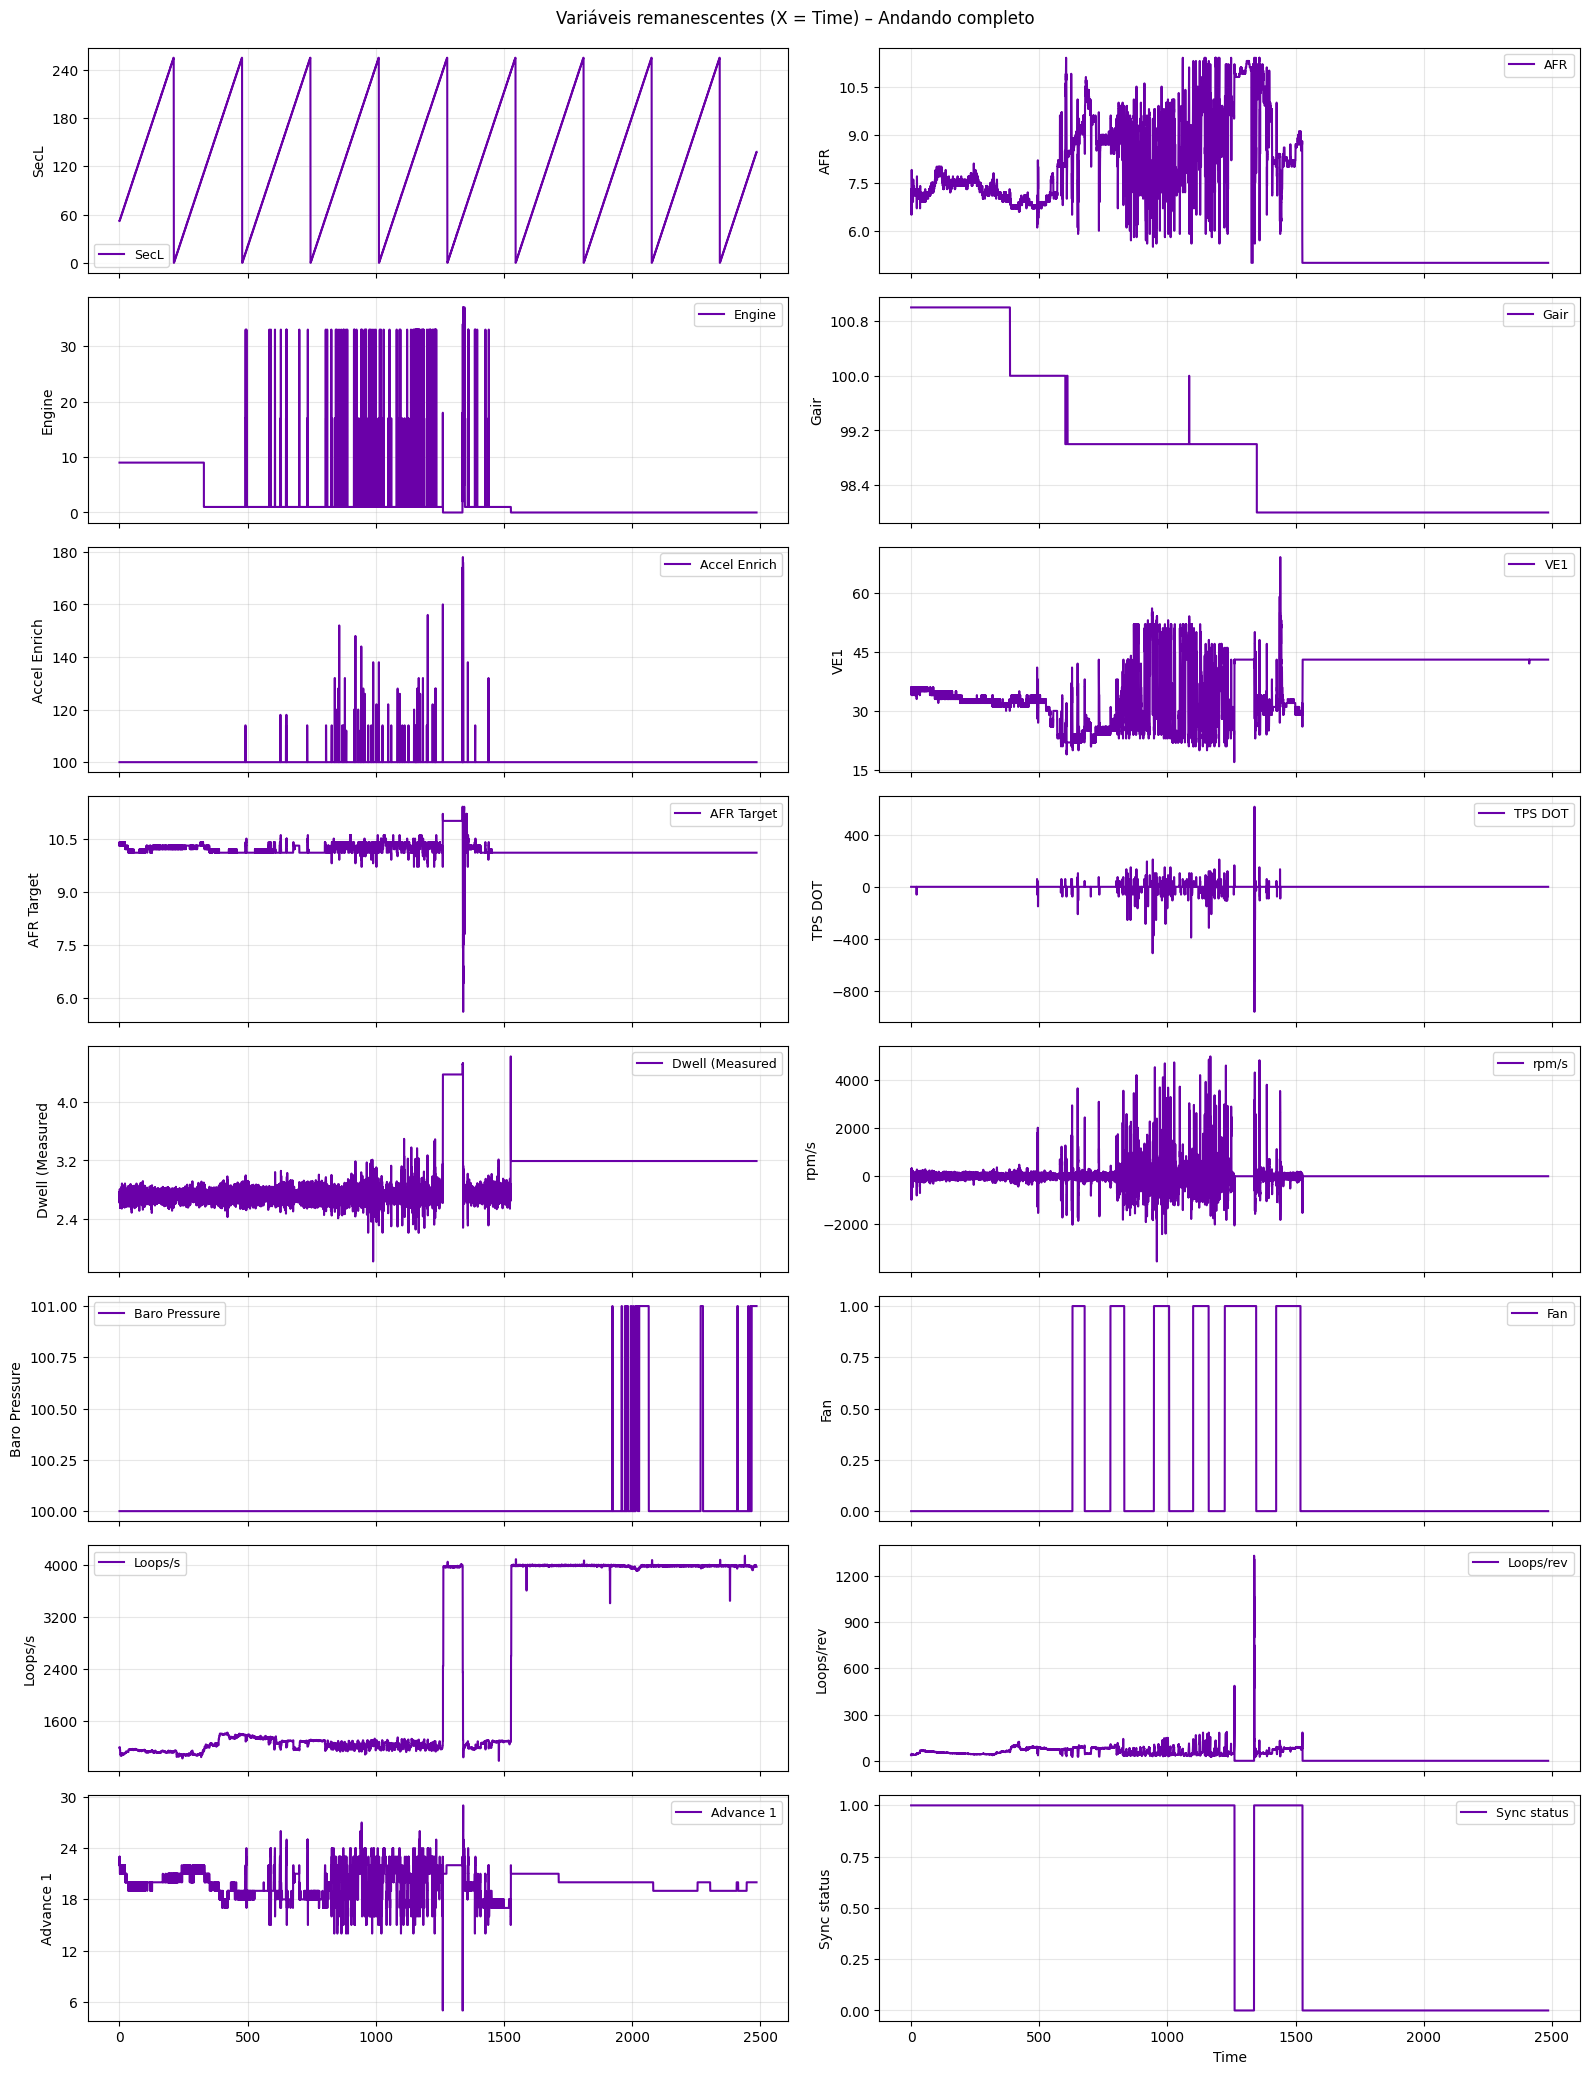

In [14]:
plot_auto_engine_views(df_filtered, "Andando completo")  # Plot the filtered dataframe